
# **Лабораторная работа №2**


## 1. Загрузка данных

---


В качестве набора данных будем использовать [набор данных по разделению клиентов на сегменты](https://www.kaggle.com/datasets/vetrirah/customer) (обучающую выборку)

Набор данных содержит следующие колонки:
+ ID - уникальный ID клиента
+ Gender - пол
+ Ever_Married - семейное положение
+ Age - возраст
+ Graduated - есть ли высшее образование
+ Profession - профессия
+ Work_Experience - трудовой стаж в годах
+ Spending_Score - оценка трат клиента
+ Family_Size - количество членов семьи, включая самого клиента
+ Var_1 - категория, к которой относится клиент
+ Segmentation - целевой признак, сегмент, к которому относится клиент


In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка датасета
data = pd.read_csv('drive/MyDrive/Colab Notebooks/LR2.csv')

In [ ]:
# Первые 5 строк датасета
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# Размер датасета
data.shape

(8068, 11)

In [ ]:
# Типы колонок
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

## 2. Обработка пропусков

---

Проверим, есть ли в наборе данных пропущенные значения:

In [ ]:
# Количество пропущенных значений
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
# Количество пропущенных значений в процентах
round(data.isnull().sum()/data.shape[0]*100,2)

ID                  0.00
Gender              0.00
Ever_Married        1.74
Age                 0.00
Graduated           0.97
Profession          1.54
Work_Experience    10.28
Spending_Score      0.00
Family_Size         4.15
Var_1               0.94
Segmentation        0.00
dtype: float64

В колонках Graduated и Var_1 менее 1% пропусков, поэтому может удалить строки, содержащие пустые значения в этих колонках:

In [ ]:
# Удаление строк с пустыми значениями в колонках Graduated и Var_1
data_new = data.dropna(axis=0, subset=['Graduated', 'Var_1']).copy()
data_new.isnull().sum()

ID                   0
Gender               0
Ever_Married       135
Age                  0
Graduated            0
Profession         114
Work_Experience    808
Spending_Score       0
Family_Size        313
Var_1                0
Segmentation         0
dtype: int64

In [ ]:
# Осталось строк
data_new.shape[0]

7914

Выберем числовые колонки с пропущенными значениями:

In [ ]:

num_cols = []
print('{:15}  {:10} {}'.format('Колонка', 'Тип', 'Количество пустых значений'))
# Цикл по колонкам датасета
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data_new.shape[0]) * 100.0, 2)
        print('{:15}  {:10} {} ({}%)'.format(col, dt, temp_null_count, temp_perc))

Колонка          Тип        Количество пустых значений
Work_Experience  float64    808 (10.21%)
Family_Size      float64    313 (3.96%)


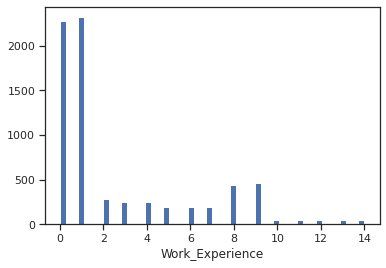

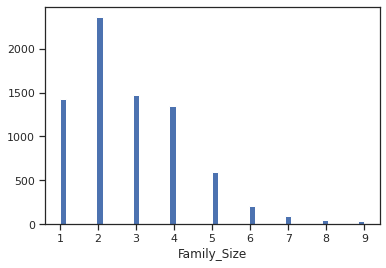

In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = data_new[num_cols]
data_num
# Гистограмма по признакам
for col in data_num:
    plt.hist(data_new[col], 50)
    plt.xlabel(col)
    plt.show()

Заполним отсутствующие значения в этих колонках с использованием импьютации:

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Функция, которая позволяет задавать колонку и вид импьютации
def num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    filled_data_imp = data_num_imp
    
    print(column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1])
    return filled_data_imp

Пропуски в колонке Work_Experience заполним медианным значением:

In [ ]:
data_new['Work_Experience'] = num_impute_col(data_new, 'Work_Experience', 'median')

Work_Experience median 808 1.0 1.0


Пропуски в колонке Family_Size заполним модальным значением:

In [ ]:
data_new['Family_Size'] = num_impute_col(data_new, 'Family_Size', 'most_frequent')

Family_Size most_frequent 313 2.0 2.0


Проверим заполнение:

In [ ]:
data_new['Work_Experience'].isnull().sum()

0

In [ ]:
data_new['Family_Size'].isnull().sum()

0

Выберем категориальные колонки с пропущенными значениями:

In [ ]:
cat_cols = []
print('{:15}  {:10} {}'.format('Колонка', 'Тип', 'Количество пустых значений'))
# Цикл по колонкам датасета
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data_new.shape[0]) * 100.0, 2)
        print('{:15}  {:10} {} ({}%)'.format(col, dt, temp_null_count, temp_perc))

Колонка          Тип        Количество пустых значений
Ever_Married     object     135 (1.71%)
Profession       object     114 (1.44%)


In [ ]:
data_new['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data_new['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

Пропуски в колонке Ever_Married заполним наиболее частым значением:

In [ ]:
data_new['Ever_Married'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data_new[['Ever_Married']])
data_new['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

Пропуски в колонке Profession заполним константой 'Not_stated':

In [ ]:
# Импьютация константой
data_new['Profession'] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Not_stated').fit_transform(data_new[['Profession']])
data_new['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not_stated'],
      dtype=object)

## 3. Кодирование категориальных признаков

---

Выберем все категориальные колонки:

In [ ]:
for col in data_new.columns:
    dt = str(data_new[col].dtype)
    if (dt=='object'):
        print(col, data_new[col].unique())

Gender ['Male' 'Female']
Ever_Married ['No' 'Yes']
Graduated ['No' 'Yes']
Profession ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' 'Not_stated']
Spending_Score ['Low' 'Average' 'High']
Var_1 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation ['D' 'A' 'B' 'C']


Колокни Gender, Ever_Married и Graduated имеют только по 2 уникальных значения, для них используем Label Encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
print(data_new['Gender'].unique())
data_new['Gender'] = le.fit_transform(data_new['Gender'])
print(data_new['Gender'].unique())

['Male' 'Female']
[1 0]


In [ ]:
print(data_new['Ever_Married'].unique())
data_new['Ever_Married'] = le.fit_transform(data_new['Ever_Married'])
print(data_new['Ever_Married'].unique())

['No' 'Yes']
[0 1]


In [ ]:
print(data_new['Graduated'].unique())
data_new['Graduated'] = le.fit_transform(data_new['Graduated'])
print(data_new['Graduated'].unique())

['No' 'Yes']
[0 1]


Колонка Spending_Score содержит значения Low, Average и High, которые можно упорядочить между собой, поэтому ее можно закодировать с помощью Ordinal Encoding:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['Low', 'Average', 'High']])
print(data_new['Spending_Score'].unique())
data_new['Spending_Score'] = oe.fit_transform(data_new[['Spending_Score']])
print(data_new['Spending_Score'].unique())

['Low' 'Average' 'High']
[0. 1. 2.]


Для колонок Profession, Var_1 и Segmentation применим One-hot кодирование:

In [ ]:
def ohc (column):
  dum = pd.get_dummies(data_new[column])
  for col in dum.columns:
    data_new.insert(data_new.columns.get_loc(column)+dum.columns.get_loc(col), col, dum[col])
  data_new.drop(column, axis=1)
  return dum.head()

In [ ]:
ohc('Profession')

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not_stated
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0


In [ ]:
ohc('Var_1')

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [ ]:
ohc('Segmentation')

,A,B,C,D
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


## 4. Масштабирование данных

---

In [ ]:
for col in data_new.columns:
    dt = str(data_new[col].dtype)
    if (dt=='int64') or (dt=='float64'):
        print(col, min(data_new[col]), max(data_new[col]))


ID 458982 467974
Gender 0 1
Ever_Married 0 1
Age 18 89
Graduated 0 1
Work_Experience 0.0 14.0
Spending_Score 0.0 2.0
Family_Size 1.0 9.0


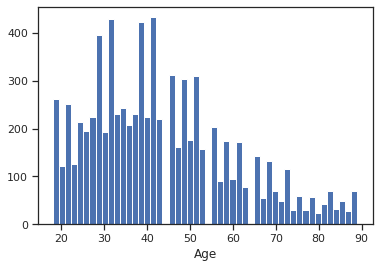

In [ ]:
plt.hist(data_new['Age'], 50)
plt.xlabel('Age')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

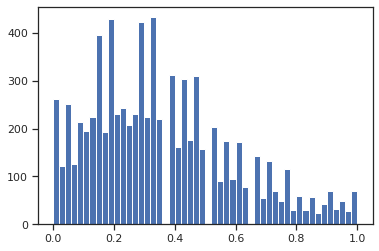

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['Age']])
plt.hist(sc1_data, 50)
plt.show()

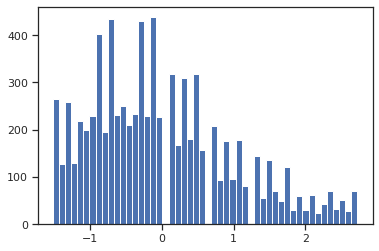

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Age']])
plt.hist(sc2_data, 50)
plt.show()